In [ ]:
!pip install --upgrade --no-cache-dir gdown

! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
To: /content/train.csv
100% 98.6M/98.6M [00:00<00:00, 117MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 81.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://d

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_data = pd.read_csv("train.csv")
test_data1 = pd.read_csv("test.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

test_data = test_data.join(submit_data["label"])

train_data["author"].fillna("-NO AUTHOR-", inplace = True)
test_data["author"].fillna("-NO AUTHOR-", inplace = True)

train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)

lab = train_data['label']

lab = lab.reset_index()
lab = lab.drop(['index'],axis=1)

train_data.reset_index(inplace=True)
train_data= train_data.apply(lambda x: x.astype(str).str.lower())
train_data = train_data.drop(columns=["id", "index"])




In [ ]:
stop_words_set = set(stopwords.words('english'))

sw_removed = []

for i in range(len(train_data)):
    review = re.sub('[^a-zA-Z]',' ',train_data['text'][i])

    review = review.split()
    review = [word for word in review if not word in stop_words_set]
    statements = ' '.join(review)
    sw_removed.append(statements)

In [ ]:
ps = PorterStemmer()

stemmed = []

print(len(sw_removed))

for i in range(len(sw_removed)):
  sw_removed_1 = sw_removed[i].split()
  stem = [ps.stem(word) for word in sw_removed_1]
  st = ' '.join(stem)
  stemmed.append(st)


20126


In [ ]:
voc_size=10000
#performing onr hot representation

onehot_repr=[one_hot(words,voc_size)for words in stemmed] 

In [ ]:
sent_length=500


embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3936 4494 8185]
 [   0    0    0 ... 6134 4248 4625]
 [3994 7981 3385 ... 2919 2244 7566]
 ...
 [   0    0    0 ... 7948 5712 7309]
 [   0    0    0 ... 8368 6161 3781]
 [3887  398 2724 ... 1826 3007 1278]]


Referred link : https://github.com/sid26ranjan/fake-news-classifier

In [ ]:
from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(lab)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train1,y_train1,validation_data=(X_test1,y_test1),epochs=20,batch_size=32)

Epoch 1/20
504/504 [==============================] - 22s 30ms/step - loss: 0.5377 - accuracy: 0.7343 - val_loss: 0.3212 - val_accuracy: 0.8713
Epoch 2/20
504/504 [==============================] - 15s 29ms/step - loss: 0.2357 - accuracy: 0.9106 - val_loss: 0.2480 - val_accuracy: 0.9036
Epoch 3/20
504/504 [==============================] - 15s 30ms/step - loss: 0.1616 - accuracy: 0.9424 - val_loss: 0.2188 - val_accuracy: 0.9232
Epoch 4/20
504/504 [==============================] - 15s 30ms/step - loss: 0.1193 - accuracy: 0.9606 - val_loss: 0.2456 - val_accuracy: 0.9198
Epoch 5/20
504/504 [==============================] - 15s 29ms/step - loss: 0.1112 - accuracy: 0.9609 - val_loss: 0.2692 - val_accuracy: 0.9173
Epoch 6/20
504/504 [==============================] - 15s 29ms/step - loss: 0.0719 - accuracy: 0.9769 - val_loss: 0.2749 - val_accuracy: 0.9138
Epoch 7/20
504/504 [==============================] - 16s 32ms/step - loss: 0.0629 - accuracy: 0.9784 - val_loss: 0.2825 - val_accuracy:

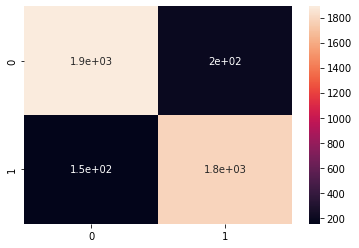

In [ ]:
pred_val= (model.predict(X_test1) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test1, pred_val)
sns.heatmap(cm, annot=True)
# plot_confusion_matrix(cm, figsize=(5,5))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('\nEvaluation Metrics for the test set:')
print("Accuracy: ", accuracy_score(y_test1.astype('int'), pred_val))
print("Precision: ", precision_score(y_test1.astype('int'), pred_val))
print("Recall: ", recall_score(y_test1.astype('int'), pred_val))
print("f1-score: ", f1_score(y_test1.astype('int'), pred_val))


Evaluation Metrics for the test set:
Accuracy:  0.9130650769995032
Precision:  0.9007056451612904
Recall:  0.9211340206185566
f1-score:  0.9108053007135576


Text(0.5, 1.0, 'ROC curve for LSTM')

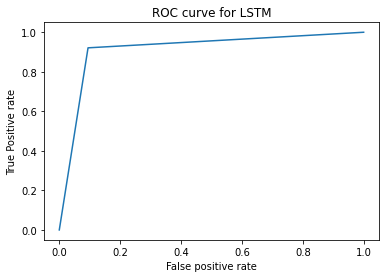

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1.astype('int'), pred_val)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve for LSTM')

In [ ]:
test_data1 = test_data1.apply(lambda x: x.astype(str).str.lower())
test_data1.fillna('fake fake fake',inplace=True)

In [ ]:
stop_words_set = set(stopwords.words('english'))
sw_removed_test = []

for i in range(len(test_data1)):
    review = re.sub('[^a-zA-Z]',' ',test_data1['text'][i])
    #not on title?
    review = review.split()
    review = [word for word in review if not word in stop_words_set]
    statements = ' '.join(review)
    sw_removed_test.append(statements)

In [ ]:
ps = PorterStemmer()
stemmed_test = []

for i in range(len(sw_removed_test)):
  sw_removed_1 = sw_removed_test[i].split()
  stem = [ps.stem(word) for word in sw_removed_1]
  st = ' '.join(stem)
  stemmed_test.append(st)

In [ ]:
onehot_repr_test=[one_hot(words,voc_size)for words in stemmed_test] 

In [ ]:
#padding for the test dataset
sent_length=500

embedded_docs_test=pad_sequences(onehot_repr_test,padding='pre',maxlen=sent_length)
print(embedded_docs_test)

[[6712 6600  210 ... 7065 5654 7373]
 [   0    0    0 ... 6480   73 9402]
 [   0    0    0 ... 4436 6671 6895]
 ...
 [1322 6620 4390 ... 5489 8472 9609]
 [   0    0    0 ... 1533 8376 5354]
 [8865 8868 7403 ... 1602  276 1956]]


In [ ]:
X_test_final = np.array(embedded_docs_test)

In [ ]:
# check=model.predict_classes(X_test_final)
check = (model.predict(X_test_final) > 0.5).astype("int32")


In [ ]:
check = list(check)
check1 = []
for i in check:
  check1.append(i[0])

In [ ]:
y_test_pred1 = pd.DataFrame({'id':test_data1['id'],'label':check1})

y_test_pred1.set_index("id",inplace = True)
y_test_pred1.to_csv("submission8.csv")